<a href="https://colab.research.google.com/github/Samikshab99/Global-Terrorism-Analysis-EDA/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [31]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [32]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
path = '/content/drive/MyDrive/'

In [34]:
df=pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis EDA/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
data = pd.read_csv(path + 'Global Terrorism Data.csv', encoding='latin-1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [37]:
df.info(verbose = True,null_counts = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [38]:
columns_to_use = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'success' , 'suicide' , 'attacktype1_txt' , 'targtype1_txt', 'gname' , 'weaptype1_txt' , 'nkill', 'nwound', 'propextent_txt' , 'propvalue' , 'ransompaid'  ]

In [39]:
len(columns_to_use)

17

In [40]:
columns_to_use

['eventid',
 'iyear',
 'imonth',
 'iday',
 'country_txt',
 'region_txt',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'gname',
 'weaptype1_txt',
 'nkill',
 'nwound',
 'propextent_txt',
 'propvalue',
 'ransompaid']

In [41]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [42]:
df.shape

(181691, 135)

In [43]:
df.head(2)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   

            city   latitude  longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792 -69.951164          1.0         0      NaN   
1    Mexico city  19.371887 -99.086624          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   

   multiple  success  suicide  attacktype1              attacktype1_txt  \
0       0.0        1        0            1                Assassination   
1       0.0        1        0            6  Hostage Taking (Kidnapping)   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   

  corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3  \
0   NaN     NaN      NaN         NaN        NaN           NaN           NaN   
1   NaN     NaN      NaN         NaN        NaN           NaN           NaN   

  targsubtype3_txt corp3 target3  natlty3 natlty3_txt  \
0              NaN   NaN     NaN      NaN         NaN   
1              NaN   NaN     NaN      NaN         NaN   

                                gname gsubname gname2 gsubname2 gname3  \
0                              MANO-D      NaN    NaN       NaN    NaN   
1  23rd of September Communist League      NaN    NaN       NaN    NaN   

  gsubname3 motive  guncertain1  guncertain2  guncertain3  individual  nperps  \
0       NaN    NaN          0.0          NaN          NaN           0     NaN   
1       NaN    NaN          0.0          NaN          NaN           0     7.0   

   nperpcap  claimed  claimmode claimmode_txt  claim2  claimmode2  \
0       NaN      NaN        NaN           NaN     NaN         NaN   
1       NaN      NaN        NaN           NaN     NaN         NaN   

  claimmode2_txt  claim3  claimmode3 claimmode3_txt  compclaim  weaptype1  \
0            NaN     NaN         NaN            NaN        NaN         13   
1            NaN     NaN         NaN            NaN        NaN         13   

  weaptype1_txt  weapsubtype1 weapsubtype1_txt  weaptype2 weaptype2_txt  \
0       Unknown           NaN              NaN        NaN           NaN   
1       Unknown           NaN              NaN        NaN           NaN   

   weapsubtype2 weapsubtype2_txt  weaptype3 weaptype3_txt  weapsubtype3  \
0           NaN              NaN        NaN           NaN           NaN   
1           NaN              NaN        NaN           NaN           NaN   

  weapsubtype3_txt  weaptype4 weaptype4_txt  weapsubtype4 weapsubtype4_txt  \
0              NaN        NaN           Na

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
df.head(2)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   

            city   latitude  longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792 -69.951164          1.0         0      NaN   
1    Mexico city  19.371887 -99.086624          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   

   multiple  success  suicide  attacktype1              attacktype1_txt  \
0       0.0        1        0            1                Assassination   
1       0.0        1        0            6  Hostage Taking (Kidnapping)   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   

  corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3  \
0   NaN     NaN      NaN         NaN        NaN           NaN           NaN   
1   NaN     NaN      NaN         NaN        NaN           NaN           NaN   

  targsubtype3_txt corp3 target3  natlty3 natlty3_txt  \
0              NaN   NaN     NaN      NaN         NaN   
1              NaN   NaN     NaN      NaN         NaN   

                                gname gsubname gname2 gsubname2 gname3  \
0                              MANO-D      NaN    NaN       NaN    NaN   
1  23rd of September Communist League      NaN    NaN       NaN    NaN   

  gsubname3 motive  guncertain1  guncertain2  guncertain3  individual  nperps  \
0       NaN    NaN          0.0          NaN          NaN           0     NaN   
1       NaN    NaN          0.0          NaN          NaN           0     7.0   

   nperpcap  claimed  claimmode claimmode_txt  claim2  claimmode2  \
0       NaN      NaN        NaN           NaN     NaN         NaN   
1       NaN      NaN        NaN           NaN     NaN         NaN   

  claimmode2_txt  claim3  claimmode3 claimmode3_txt  compclaim  weaptype1  \
0            NaN     NaN         NaN            NaN        NaN         13   
1            NaN     NaN         NaN            NaN        NaN         13   

  weaptype1_txt  weapsubtype1 weapsubtype1_txt  weaptype2 weaptype2_txt  \
0       Unknown           NaN              NaN        NaN           NaN   
1       Unknown           NaN              NaN        NaN           NaN   

   weapsubtype2 weapsubtype2_txt  weaptype3 weaptype3_txt  weapsubtype3  \
0           NaN              NaN        NaN           NaN           NaN   
1           NaN              NaN        NaN           NaN           NaN   

  weapsubtype3_txt  weaptype4 weaptype4_txt  weapsubtype4 weapsubtype4_txt  \
0              NaN        NaN           Na

In [46]:
new_df = df[columns_to_use]

In [47]:
new_df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [48]:
new_df.country_txt.nunique()

205

In [49]:
new_df.region_txt.nunique()

12

In [50]:
new_df.region_txt.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [51]:
 #Unique values in type of attack
new_df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [52]:
 #getting rid of all uknown values in complete dataframe
new_df = new_df.replace(['Unknown'],None)

In [53]:
new_df['attacktype1_txt'] = new_df['attacktype1_txt'].replace(['Hostage Taking (Kidnapping)','Hostage Taking (Barricade Incident)'],['Hostage Taking','Hostage Taking'])

In [54]:
new_df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking',
       'Unarmed Assault'], dtype=object)

In [55]:
new_df.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Transportation', 'Tourists',
       'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [56]:
new_df.targtype1_txt.nunique()

21

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3096ccaa10>,
      dtype=object)

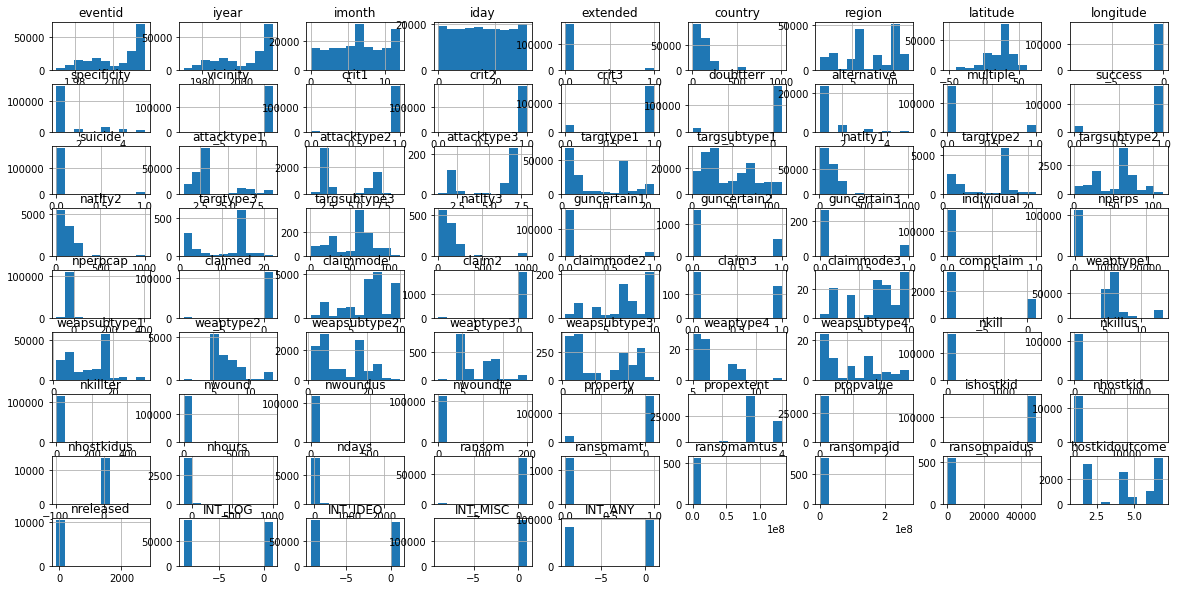

In [57]:
# This represents  the distribution of data  on each series in the DataFrame.
data.hist(figsize=(20,10))  

## The Global Terrorism Database (GTD) provides information on terrorist attacks that have been documented in the news since 1970. Curated by The National Consortium for the Study of Terrorism and Responses to Terrorism , this database indicates terrorist attack per region. Figure  shows number of terrorist attack per region .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


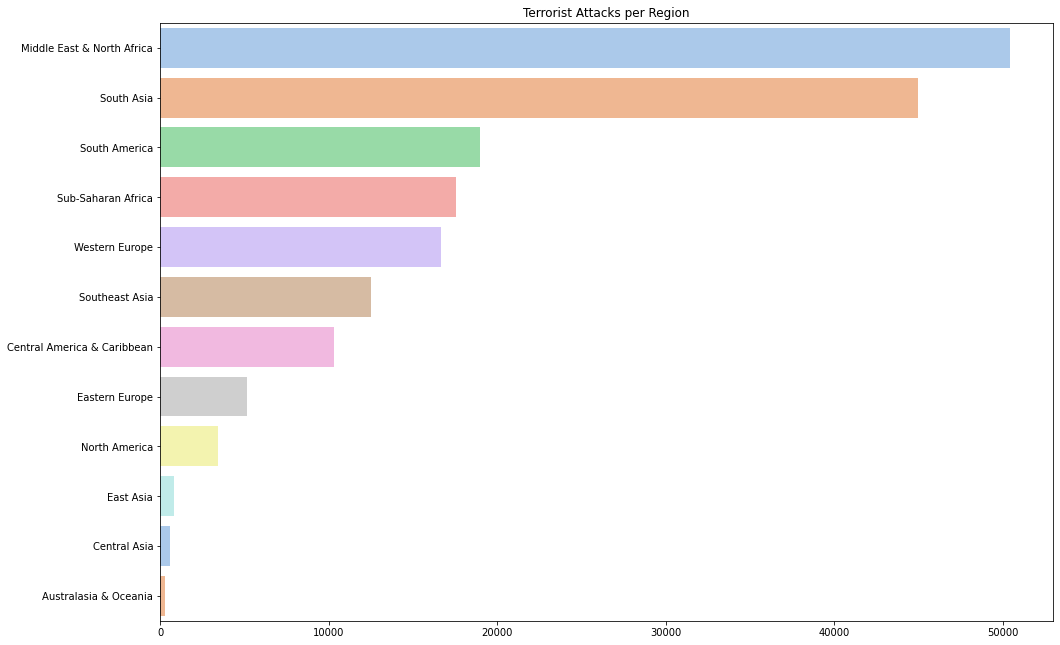

In [58]:
#Finding number of terrorist attack per region

#Describing the layout of figure
plt.subplots(figsize=(16,11))
sns.barplot(df['region_txt'].value_counts()[:20].values,df['region_txt'].value_counts()[:20].index,palette='pastel')
plt.title('Terrorist Attacks per Region')
plt.show()


## Now, let see which are the top 5 region in which number of terrorist attacks were more as compared to other region and how the terrorist attacks increased over the years .

---



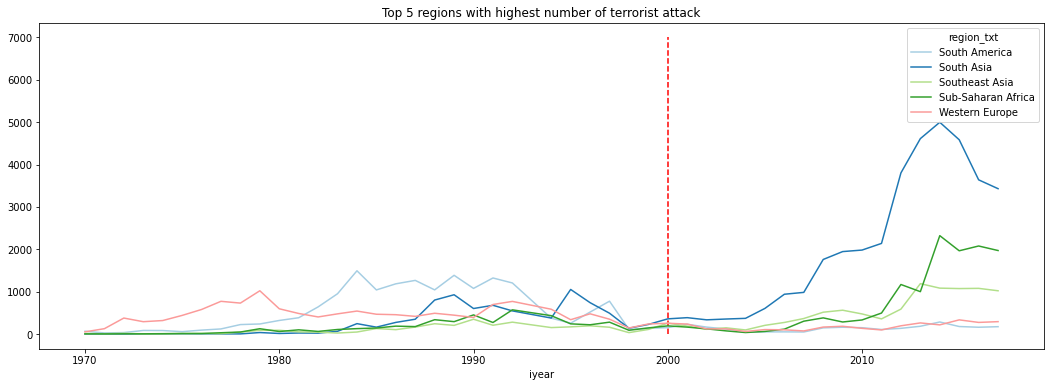

In [65]:
#Finding  top 5 region with highest terrorist attack.

top_regions=df[df['region_txt'].isin(df['region_txt'].value_counts()[1:6].index)]
pd.crosstab(top_regions.iyear,top_regions.region_txt).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.vlines(x=2000,ymin=0,ymax=7000,colors='red',linestyles='--')
plt.title('Top 5 regions with highest number of terrorist attack')
plt.show()

## From above figure we can see that South America was the region with highest number of attack till year 2000 after that South Asia was the region which observed the highest number of attack.

## Now ,lets figure out which was the region with highest terrorist attack and the region with lowest number of terrorist attack.

In [59]:
#Finding the region with highest and lowest terrorist attack
terr=data.groupby(['region_txt'],as_index=False).count()

max_count=terr['iyear'].max()
max_id=terr['iyear'].idxmax()
max_name=terr['region_txt'][max_id]

min_count=terr['iyear'].min()
min_id=terr['iyear'].idxmin()
min_name=terr['region_txt'][min_id]

In [60]:
#Printing the region with highest and lowest terrorist attack
print(max_name,'has suffered the maximum number of terrorist attacks of',max_count,'.')
print(min_name,'has suffered the minimum number of terrorist attacks of',min_count,'.')

Middle East & North Africa has suffered the maximum number of terrorist attacks of 50474 .
Australasia & Oceania has suffered the minimum number of terrorist attacks of 282 .


## As we know number of terrorist attack in region and country , so now lets find which type of terrorist attack were happend during war.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


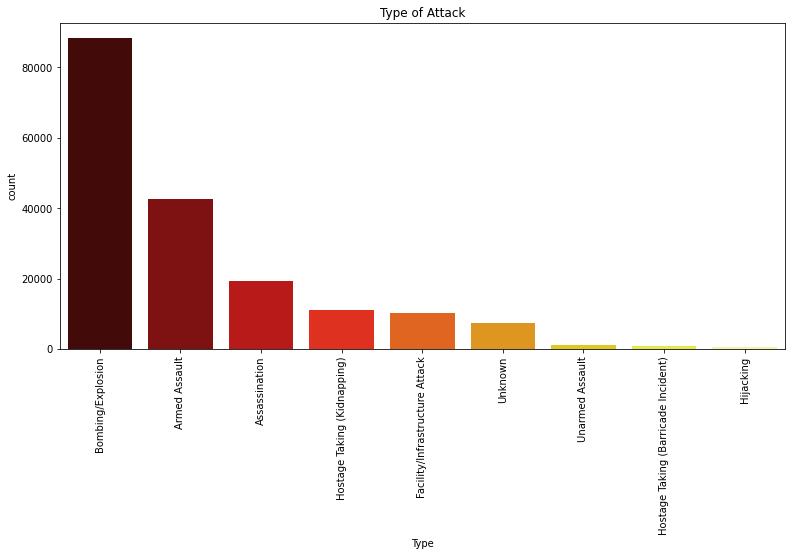

In [61]:
#Finding the type of terrorist attack and ploting the graph
plt.figure(figsize=(13,6))
sns.countplot(data['attacktype1_txt'],order=data['attacktype1_txt'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Attack')
plt.show()

## From above we can see that there were many type of attack which happened during the war among which bombing/explosion has the highest number of count whereas hijaking has the lowest number of count.

## When the war take place the terrorist always have there target fixed like wheather they want to attack military or goverment or religious places. So lets find out which were the type of target.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


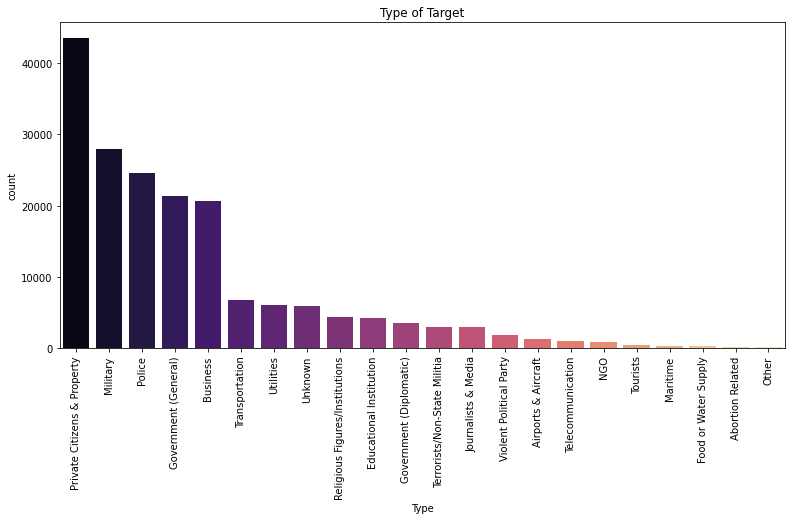

In [62]:
#Finding type of target
plt.figure(figsize=(13,6))
sns.countplot(data['targtype1_txt'],order=data['targtype1_txt'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

## From above, we can see private citizens & property were the most targeted type followed by military and police. 

## Lets see trend of terrorist attack from 1970 to 2017.

Text(0.5, 1.0, 'Trend of increase in terrorism from 1970 to 2017')

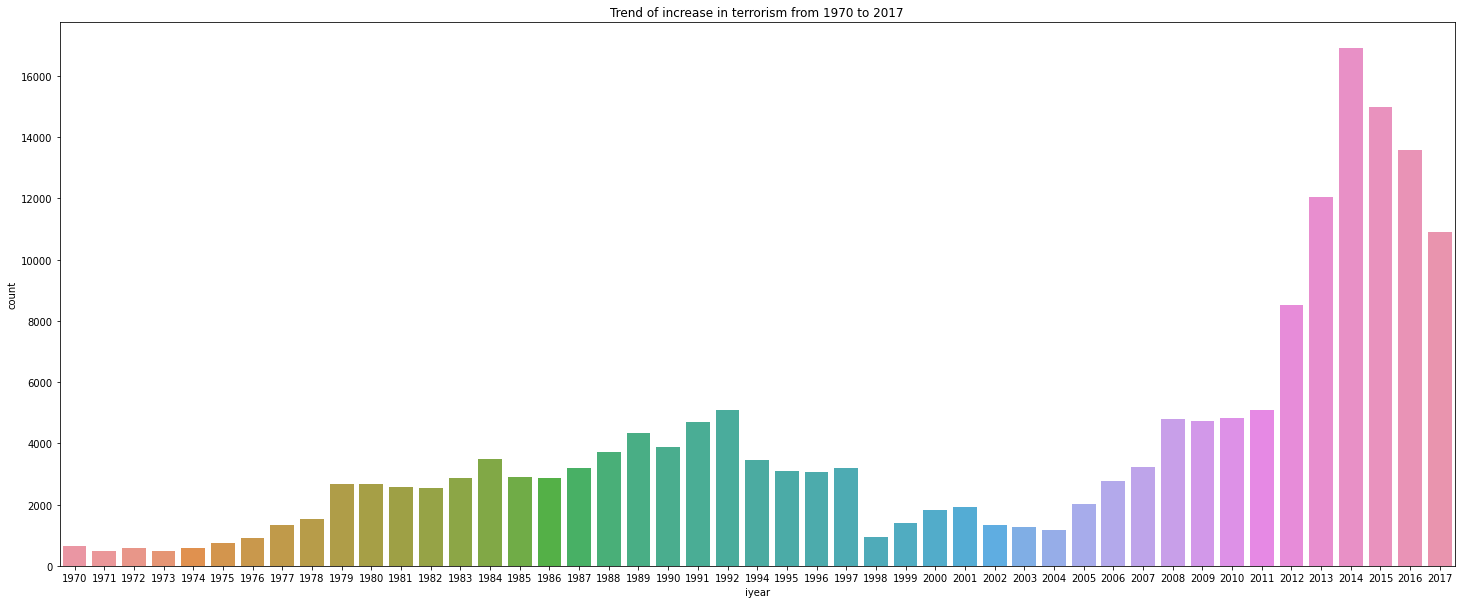

In [63]:
#Let's check trend of increase in terrorism 
plt.figure(figsize=(25,10))
sns.countplot(x="iyear", data=df)
plt.title('Trend of increase in terrorism from 1970 to 2017')

## You can observe that from 1970 to 2003 the terrorism was varying sometimes it was high and sometime it was low . As you can see from the year 2004 the terrorism increased exponentially.

---



## Now lets find number of attack in 1970 and 2017 

In [64]:
#Number of Attacks happened in 1970 and 2017
iyear=data.iyear.value_counts().to_dict()

print('The number of attacks happended in 1970 are',iyear[1970],'& the number of attacks happended in 2017 are ',iyear[2017])

# Number  of Attack  increased from 1970 till 2017 in percentage
rate=((iyear[2017]-iyear[1970])/iyear[2017])*100
print('So we can see that the number of attack from 1970 till 2017 has increased by ',np.round(rate,0))

The number of attacks happended in 1970 are 651 & the number of attacks happended in 2017 are  10900
So we can see that the number of attack from 1970 till 2017 has increased by  94.0


In [67]:
px.scatter(data,data.nwound,data.nkill,hover_name='country_txt',animation_frame='iyear',animation_group='country_txt',color='attacktype1_txt',
           range_color=[0,1],labels={'nkill':'Deaths','nwound':'Casualities'},
           title='Number of casualities vs Killed people in each country for each year')